In [90]:
import sys
import os

src_path = r'C:\Users\rshaw\Desktop\EC Utbildning - Data Science\Kurs 9 - Project\Project\ds23_projektkurs\predictive-maintenance\src\Data processing scripts'
sys.path.append(src_path)

from Logging_module import LoggerSetup


### Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'


### Load pre-processed data from SQL database

In [82]:
data_logger = LoggerSetup(logger_name='Data_Logger', log_file='data_log.log').get_logger()
engine = create_engine('mssql+pyodbc://MSI/predictive_maintenance_db?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
try:
    data_logger.info("Loading 'PdM_errors' data from the database.")
    errors_df = pd.read_sql('SELECT * FROM PdM_errors', con=engine)
    data_logger.info("'PdM_errors' data loaded successfully.")

    data_logger.info("Loading 'PdM_failures' data from the database.")
    failures_df = pd.read_sql('SELECT * FROM PdM_failures', con=engine)
    data_logger.info("'PdM_failures' data loaded successfully.")

    data_logger.info("Loading 'PdM_machines' data from the database.")
    machines_df = pd.read_sql('SELECT * FROM PdM_machines', con=engine)
    data_logger.info("'PdM_machines' data loaded successfully.")

    data_logger.info("Loading 'PdM_maint' data from the database.")
    maint_df = pd.read_sql('SELECT * FROM PdM_maint', con=engine)
    data_logger.info("'PdM_maint' data loaded successfully.")

    data_logger.info("Loading 'PdM_telemetry' data from the database.")
    telemetry_df = pd.read_sql('SELECT * FROM PdM_telemetry', con=engine)
    data_logger.info("'PdM_telemetry' data loaded successfully.")

except Exception as e:
    data_logger.error(f"Error occurred while loading data: {e}")

In [89]:
with open('data_log.log', 'r') as log_file:
    content = log_file.read()
    print(content)


[2024-10-22 13:11][INFO] Loading 'PdM_errors' data from the database.
[2024-10-22 13:11][INFO] 'PdM_errors' data loaded successfully.
[2024-10-22 13:11][INFO] Loading 'PdM_failures' data from the database.
[2024-10-22 13:11][INFO] 'PdM_failures' data loaded successfully.
[2024-10-22 13:11][INFO] Loading 'PdM_machines' data from the database.
[2024-10-22 13:11][INFO] 'PdM_machines' data loaded successfully.
[2024-10-22 13:11][INFO] Loading 'PdM_maint' data from the database.
[2024-10-22 13:11][INFO] 'PdM_maint' data loaded successfully.
[2024-10-22 13:11][INFO] Loading 'PdM_telemetry' data from the database.
[2024-10-22 13:11][INFO] 'PdM_telemetry' data loaded successfully.
[2024-10-22 13:24][INFO] Data logger initialized and ready to use.



### Read datasets

In [3]:
print("Errors DataFrame:")
display(errors_df.head())

print("Failures DataFrame:")
display(failures_df.head())

print("Machines DataFrame:")
display(machines_df.head())

print("Maintenance DataFrame:")
display(maint_df.head())

print("Telemetry DataFrame:")
display(telemetry_df.head())


Errors DataFrame:


,datetime,machineID,errorID,date
0,2015-01-03 07:00:00,1,error1,2015-01-03
1,2015-01-03 20:00:00,1,error3,2015-01-03
2,2015-01-04 06:00:00,1,error5,2015-01-04
3,2015-01-10 15:00:00,1,error4,2015-01-10
4,2015-01-22 10:00:00,1,error4,2015-01-22


Failures DataFrame:


,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,comp4,2015-01-05
1,2015-03-06 06:00:00,1,comp1,2015-03-06
2,2015-04-20 06:00:00,1,comp2,2015-04-20
3,2015-06-19 06:00:00,1,comp4,2015-06-19
4,2015-09-02 06:00:00,1,comp4,2015-09-02


Machines DataFrame:


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Maintenance DataFrame:


,datetime,machineID,comp,date
0,2014-06-01 06:00:00,1,comp2,2014-06-01
1,2014-07-16 06:00:00,1,comp4,2014-07-16
2,2014-07-31 06:00:00,1,comp3,2014-07-31
3,2014-12-13 06:00:00,1,comp1,2014-12-13
4,2015-01-05 06:00:00,1,comp4,2015-01-05


Telemetry DataFrame:


,datetime,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


In [4]:
print(telemetry_df.head())
print(telemetry_df['datetime'].min(), telemetry_df['datetime'].max())


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01  
2015-01-01 06:00:00 2016-01-01 06:00:00


In [5]:
telemetry_df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,876100,2015-07-02 18:00:00,2015-01-01 06:00:00,2015-04-02 12:00:00,2015-07-02 18:00:00,2015-10-02 00:00:00,2016-01-01 06:00:00,NaN
machineID,876100.0,50.5,1.0,25.75,50.5,75.25,100.0,28.866087
volt,876100.0,170.777736,97.333604,160.304927,170.607338,181.004493,255.124717,15.509114
rotate,876100.0,446.605119,138.432075,412.305714,447.55815,482.1766,695.020984,52.673886
pressure,876100.0,100.858668,51.237106,93.498181,100.425559,107.555231,185.951998,11.048679
vibration,876100.0,40.385007,14.877054,36.777299,40.237247,43.784938,76.791072,5.370361


- Here we see sensor data for 4 operational settings that occurred over 12 months between January 1, 2015, and January 01, 2016. 


In [6]:
print(failures_df.head())
print(failures_df['datetime'].min(), failures_df['datetime'].max())


             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02
2015-01-02 03:00:00 2015-12-31 06:00:00


- Here we see that failures occurred over 12 months between January 2, 2015, and December 31, 2015. - 
- Failures involve different components (comp1, comp2, comp4), all related to machine ID 1 during this time range. 

### Here we drill down to focus on one machine from 100, namely machine no. 17

In [7]:
df_sel_17 = telemetry_df.loc[telemetry_df['machineID'] == 17].reset_index(drop=True)
print(df_sel_17.head(n=5))

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00         17  161.633747  462.698035   90.377391   
1 2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
2 2015-01-01 08:00:00         17  186.476591  498.922070   97.924391   
3 2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
4 2015-01-01 10:00:00         17  182.431544  502.774702  108.220639   

   vibration        date  
0  49.453414  2015-01-01  
1  57.482661  2015-01-01  
2  47.786767  2015-01-01  
3  66.352721  2015-01-01  
4  54.571089  2015-01-01  


In [8]:
df_sel_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8761 non-null   datetime64[ns]
 1   machineID  8761 non-null   int64         
 2   volt       8761 non-null   float64       
 3   rotate     8761 non-null   float64       
 4   pressure   8761 non-null   float64       
 5   vibration  8761 non-null   float64       
 6   date       8761 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


 - This machine number 17 has 8761 rows and 7 columns, including telemetry data (volt, rotate, pressure, vibration) and machineID.
- All columns are numeric except for the datetime column which is a timestamp, and date which is an object type (string).
- Memory used is approx 479.2 KB 
- There are no missing values.

In [9]:
print(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']].describe())

              volt       rotate     pressure    vibration
count  8761.000000  8761.000000  8761.000000  8761.000000
mean    170.726237   445.968525   101.342908    40.549045
std      15.694063    53.034564    11.325382     5.516199
min     107.286569   223.268150    66.079113    20.487291
25%     160.150078   411.696585    93.976460    36.896442
50%     170.503300   446.855943   100.851812    40.320077
75%     181.075973   482.323013   107.945500    43.925871
max     240.105419   637.852152   152.605505    70.587984


- Sensor Ranges: All sensor readings (voltage, rotation, pressure, vibration) show reasonable variability, with voltage and rotation having the highest range of values.

- Relatively Low Variation in Vibration: The vibration sensor has the lowest standard deviation, meaning its values are more tightly clustered around the mean compared to other sensors

In [10]:
df_sel_17.duplicated().sum()

0

In [11]:
round(df_sel_17.isnull().sum() / df_sel_17.isnull().count() * 100, 2)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
date         0.0
dtype: float64

- This is just an additional check, but we can confirm here that there are no missing values and that our pre-processing of the raw datasets cleared any duplicates.

In [12]:
def histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=df_sel_17, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        df_sel_17[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        df_sel_17[feature].median(), color="black", linestyle="-"
    )  

Skipping column: datetime
Skipping column: machineID
Skipping column: date


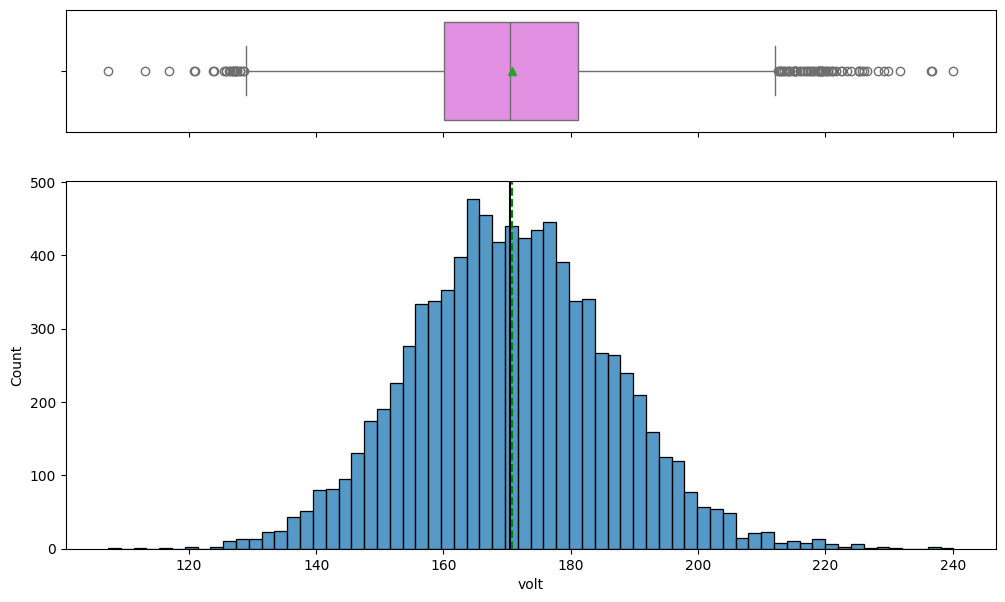

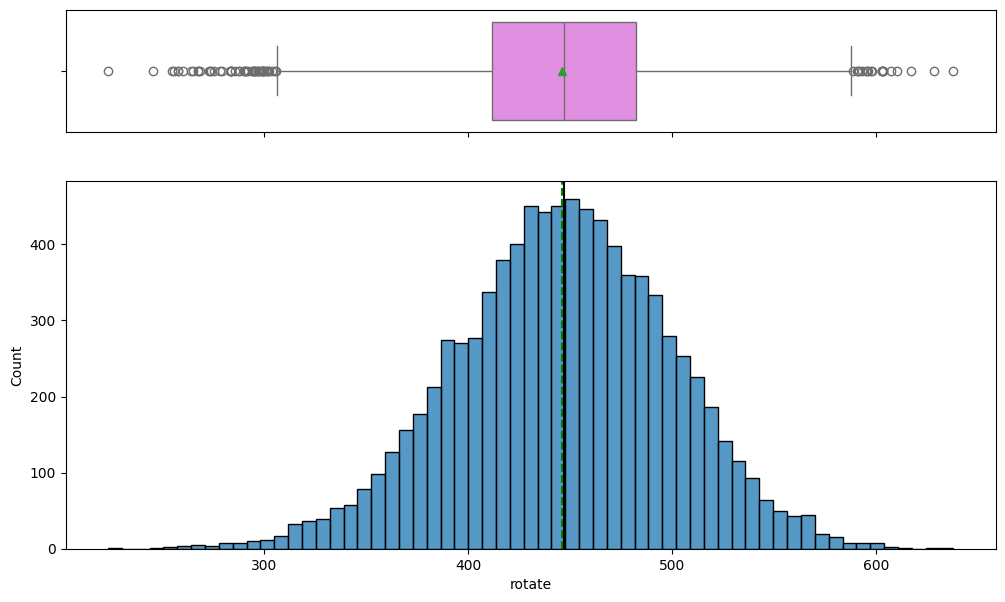

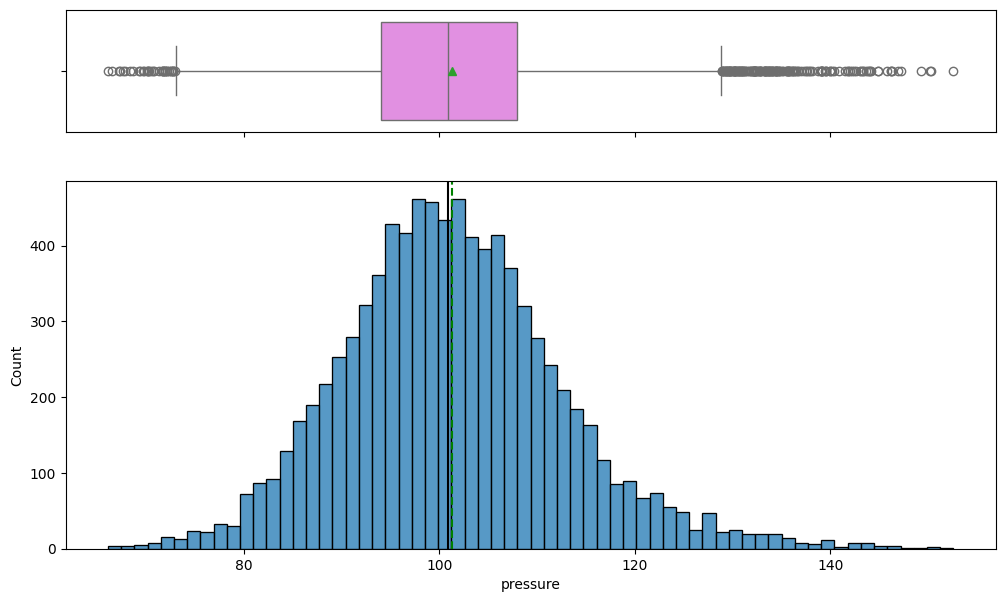

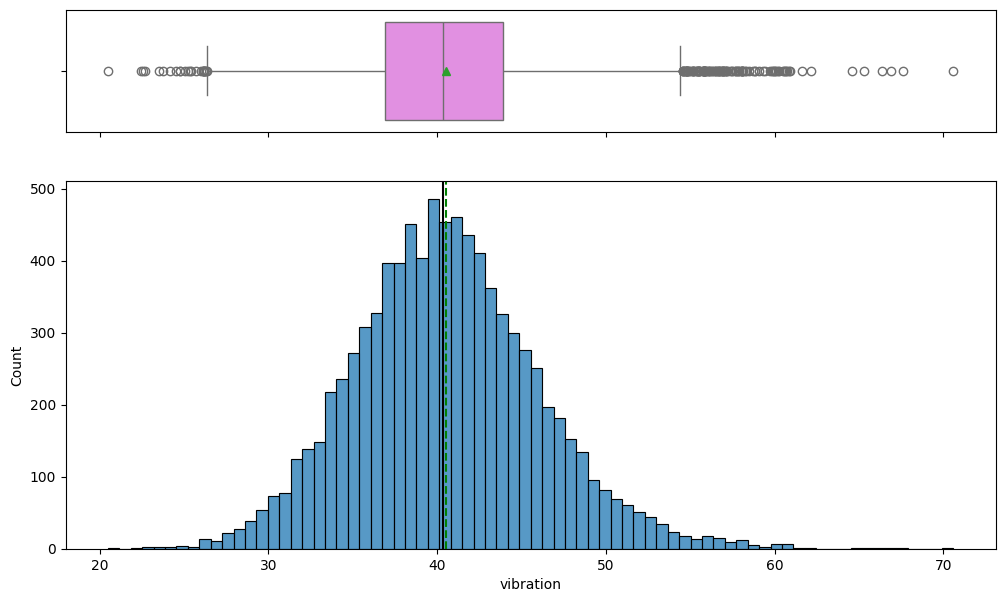

In [13]:
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

for feature in df_sel_17.columns:
    if is_numeric(df_sel_17[feature]) and feature != 'machineID':
        histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None)
    else:
        print(f"Skipping column: {feature}")

- Most of the sensors show a fairly normal distribution, with the mean and median values aligning closely.

- Standard Deviation appears to vary across the sensors, with a considerable portion of sensor readings showing spread beyond typical ranges. While some distributions have a higher concentration around the mean, sensors like pressure and voltage show a greater spread with extreme outliers.

- Outliers are present across all four sensors. The voltage and rotation sensors have several outliers on both the lower and upper ends. While these outliers exist, they don't seem to significantly distort the central values (mean and median). The pressure and vibration sensors also show a reasonable number of outliers on the higher end.

- The rotation sensor shows a slight right skew, as shown by a few high-value outliers stretching beyond the bulk of the data. Meanwhile, vibration shows a slight left skew, with more values on the lower side, though it is less pronounced.

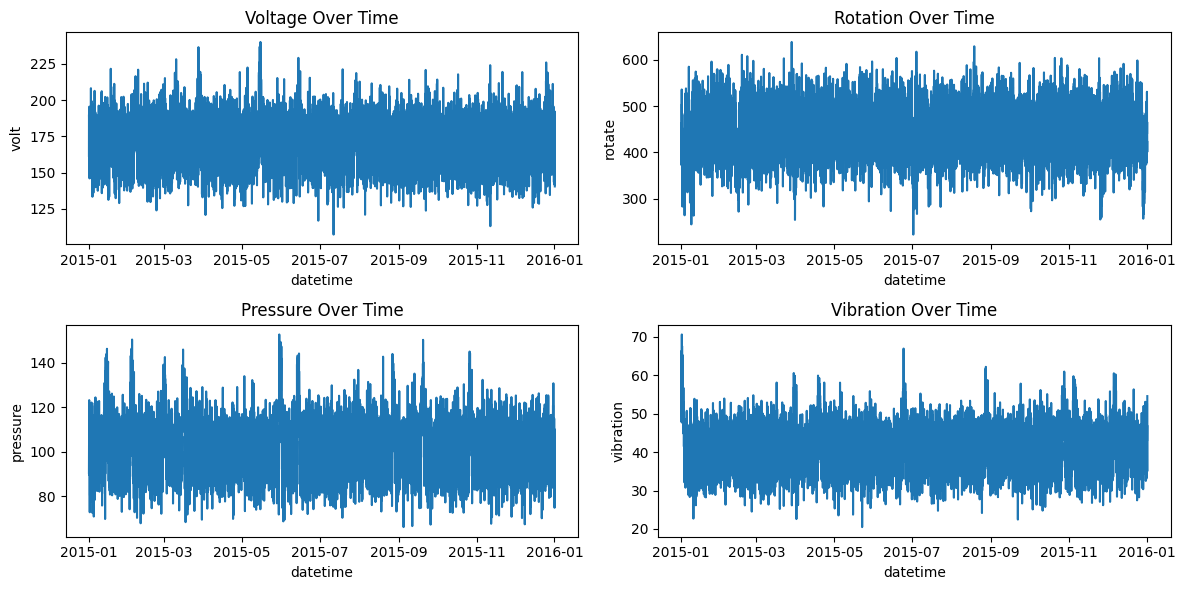

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x='datetime', y='volt', data=df_sel_17)
plt.title('Voltage Over Time')

plt.subplot(2, 2, 2)
sns.lineplot(x='datetime', y='rotate', data=df_sel_17)
plt.title('Rotation Over Time')

plt.subplot(2, 2, 3)
sns.lineplot(x='datetime', y='pressure', data=df_sel_17)
plt.title('Pressure Over Time')

plt.subplot(2, 2, 4)
sns.lineplot(x='datetime', y='vibration', data=df_sel_17)
plt.title('Vibration Over Time')

plt.tight_layout()
plt.show()

- There seems to be quite a few spikes that could be anomalies leading to errors or failures.
- We'll investigate further using z-scores to see how many standard deviations a sensor data point is from the mean, where we will target any point outside of -3 and +3 as anomaly.

In [15]:
from sklearn.preprocessing import StandardScaler

#Create plots of Z-scores for this machine to check for anomalies over time in sensor data 
scaler = StandardScaler()
z_scores = scaler.fit_transform(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']])
z_scores_df = pd.DataFrame(z_scores, columns=['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore'])
df_anomalies = pd.concat([df_sel_17, z_scores_df], axis=1)
anomalies = df_anomalies[
    (df_anomalies['volt_zscore'].abs() > 3) |
    (df_anomalies['rotate_zscore'].abs() > 3) |
    (df_anomalies['pressure_zscore'].abs() > 3) |
    (df_anomalies['vibration_zscore'].abs() > 3)
]

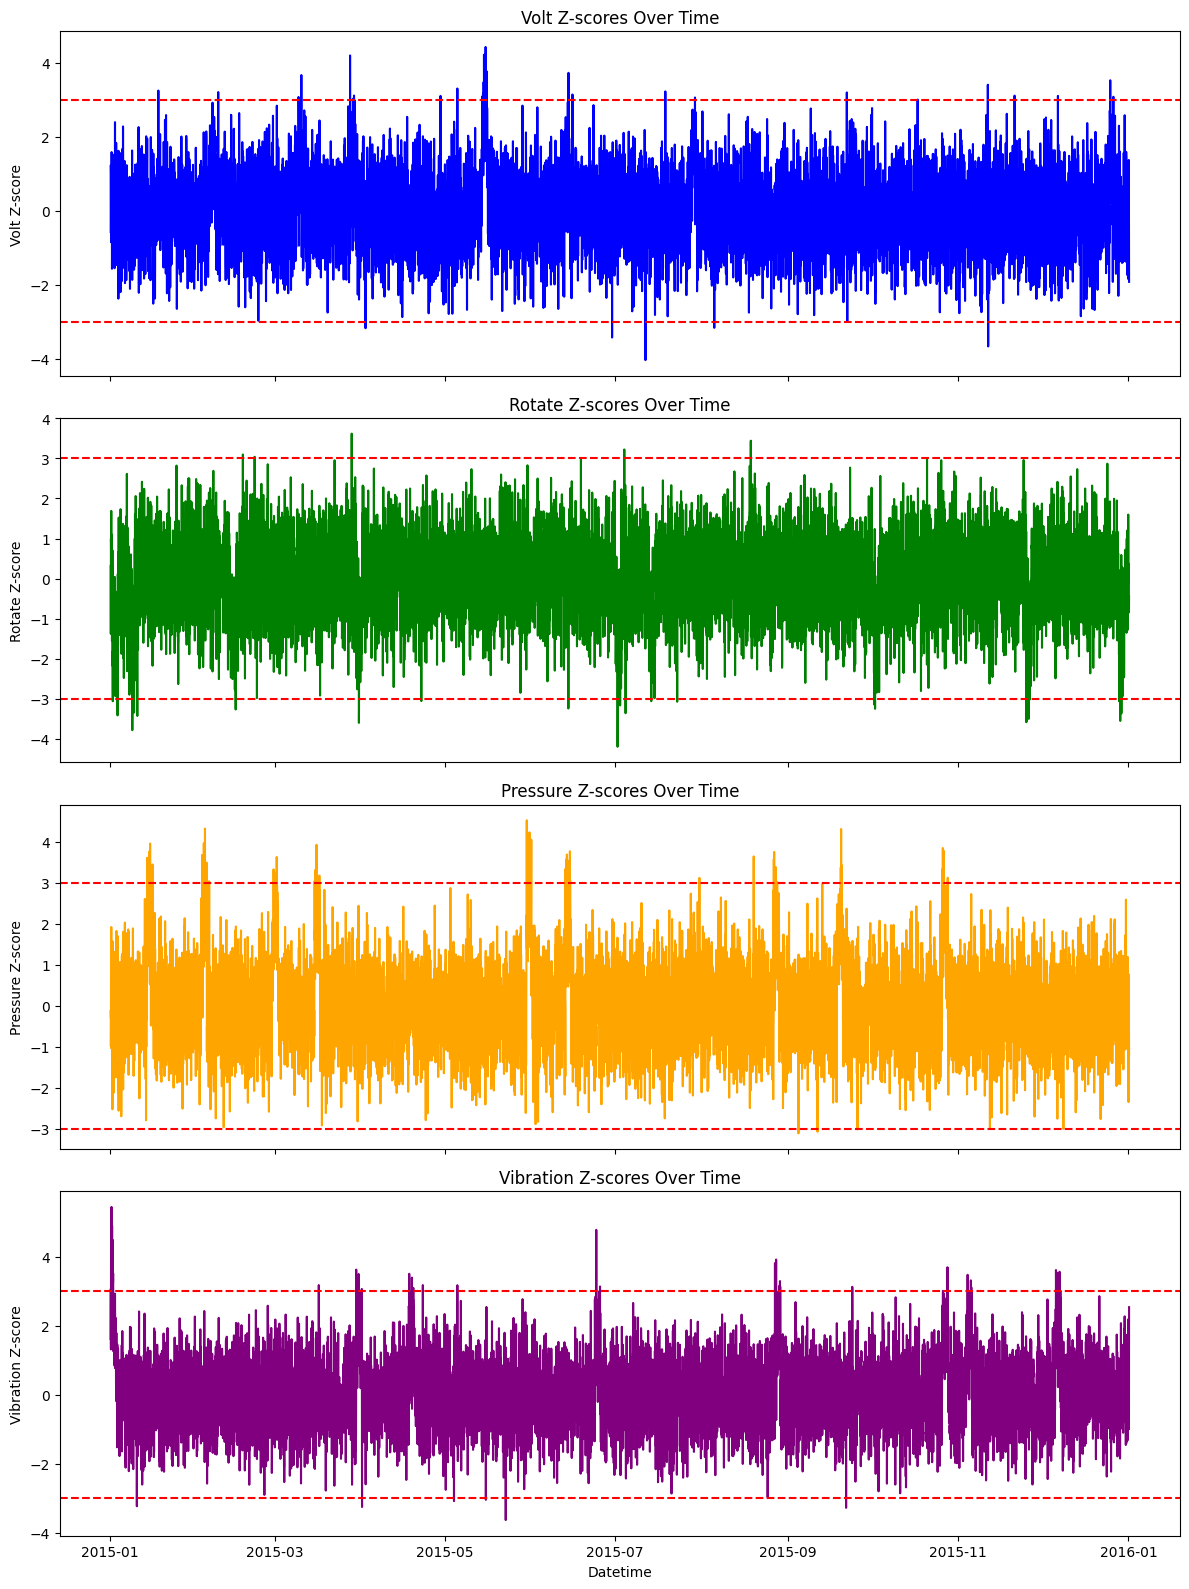

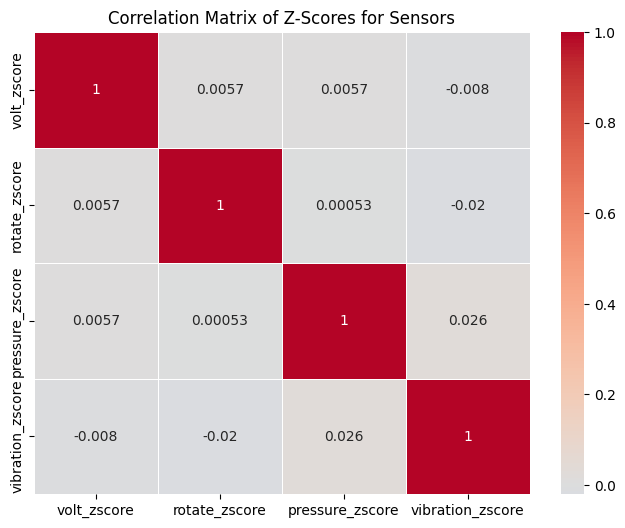

In [16]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(df_anomalies['datetime'], df_anomalies['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time')

axs[1].plot(df_anomalies['datetime'], df_anomalies['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time')

axs[2].plot(df_anomalies['datetime'], df_anomalies['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time')

axs[3].plot(df_anomalies['datetime'], df_anomalies['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time')

axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()

correlation_matrix = df_anomalies[['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore']].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Z-Scores for Sensors')
plt.show()

- Both pressure and vibration seem to have more frequent spikes exceeding the threshold, indicating more frequent anomalies.

- The most notable correlation is between the rotate_zscore and vibration_zscore (0.63), meaning these sensors tend to show anomalies at the same time. On the other hand, volt_zscore and pressure_zscore have a moderate negative correlation (-0.60), indicating an inverse relationship.

- These anomalies and correlations give us a good reason to zoom into the time period with most visual peaks during during the first quarter of 2015, to investigate potential patterns, causes, and behavior.

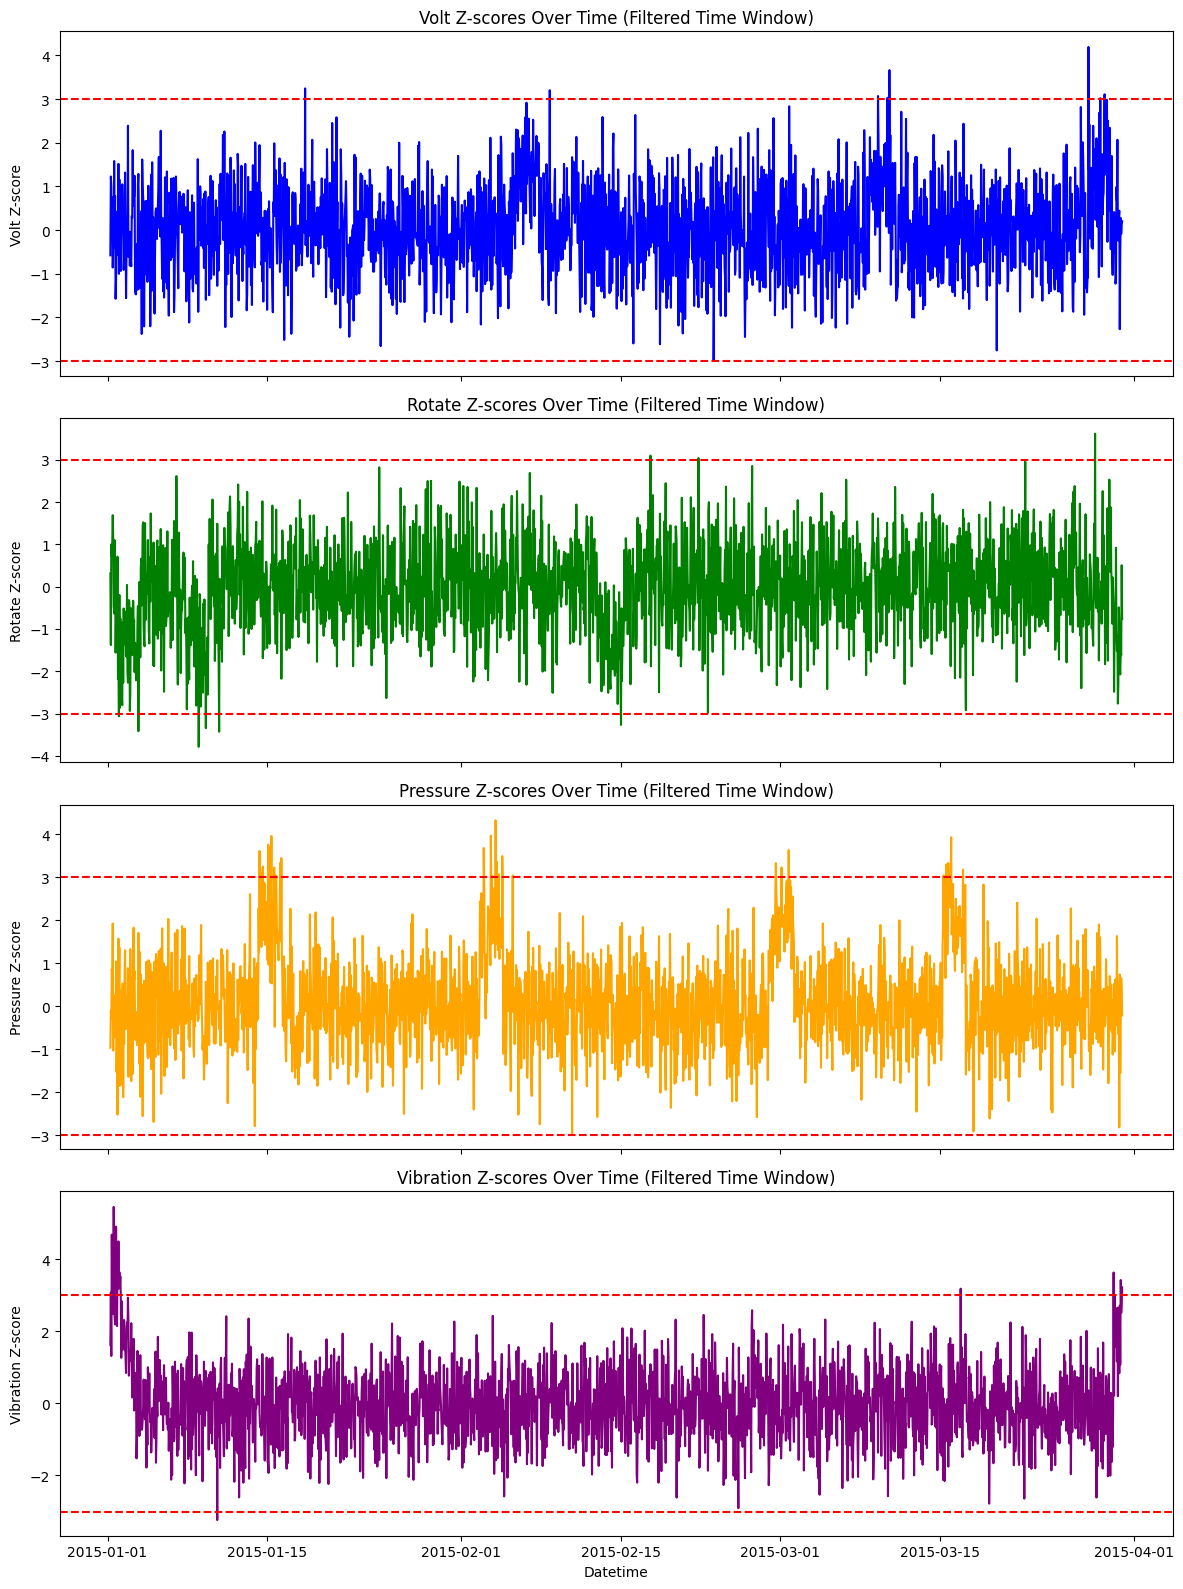

In [17]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])
start_date = '2015-01-01'
end_date = '2015-03-31'
df_time_window = df_anomalies[(df_anomalies['datetime'] >= start_date) & (df_anomalies['datetime'] <= end_date)]
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(df_time_window['datetime'], df_time_window['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time (Filtered Time Window)')

axs[1].plot(df_time_window['datetime'], df_time_window['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time (Filtered Time Window)')

axs[2].plot(df_time_window['datetime'], df_time_window['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time (Filtered Time Window)')

axs[3].plot(df_time_window['datetime'], df_time_window['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time (Filtered Time Window)')

axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()


Overall, this first-quarter analysis highlights significant fluctuations, especially in voltage, pressure, and vibration, with several data points indicating potential anomalies or outliers. These might correlate with system irregularities or potential failures if left unchecked.

### Data Preprocessing (in addition to Missis scripts)

In [92]:
#Here we convert model to an integer to limit features for the model later to avoid multi-collinearity and overfitting.
model_mapping = {value: i for i, value in enumerate(machines_df['model'].unique(), start=1)}
machines_df['model'] = machines_df['model'].map(model_mapping)

data_logger.info(f"Model mapping completed successfully. Mapping: {model_mapping}")
display(machines_df)

,machineID,model,age
0,1,1,18
1,2,2,7
2,3,1,8
3,4,1,7
4,5,1,2
...,...,...,...
95,96,3,10
96,97,3,14
97,98,3,20
98,99,4,14


In [19]:
failures_df = pd.get_dummies(failures_df, columns=['failure'], prefix='fail', dtype=int)
maint_df = pd.get_dummies(maint_df, columns=['comp'], prefix='maint', dtype=int)
errors_df = pd.get_dummies(errors_df, columns=['errorID'], prefix='', prefix_sep='', dtype=int)

In [20]:
errors_df.rename(columns={'datetime': 'datetime_error'}, inplace=True)
failures_df.rename(columns={'datetime': 'datetime_failure'}, inplace=True)
maint_df.rename(columns={'datetime': 'datetime_maint'}, inplace=True)
telemetry_df.rename(columns={'datetime': 'datetime_telemetry'}, inplace=True)

errors_df['datetime_error'] = pd.to_datetime(errors_df['datetime_error'])
failures_df['datetime_failure'] = pd.to_datetime(failures_df['datetime_failure'])
maint_df['datetime_maint'] = pd.to_datetime(maint_df['datetime_maint'])
telemetry_df['datetime_telemetry'] = pd.to_datetime(telemetry_df['datetime_telemetry'])

print(errors_df['datetime_error'].dtypes)
print(failures_df['datetime_failure'].dtypes)
print(maint_df['datetime_maint'].dtypes)
print(telemetry_df['datetime_telemetry'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [21]:
# Create failure, error and maintenance flags to prep for feature engineering
failures_df['failure_flag'] = 1
failure_count = failures_df['failure_flag'].sum()

errors_df['error_flag'] = 1
error_count = errors_df['error_flag'].sum()

maint_df['maint_flag'] = 1
maintenance_count = maint_df['maint_flag'].sum()

print(f"Number of failures: {failure_count}")
print(f"Number of errors: {error_count}")
print(f"Number of maintenances: {maintenance_count}")

Number of failures: 761
Number of errors: 3919
Number of maintenances: 3286


In [22]:
maint_df.head()

,datetime_maint,machineID,date,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag
0,2014-06-01 06:00:00,1,2014-06-01,0,1,0,0,1
1,2014-07-16 06:00:00,1,2014-07-16,0,0,0,1,1
2,2014-07-31 06:00:00,1,2014-07-31,0,0,1,0,1
3,2014-12-13 06:00:00,1,2014-12-13,1,0,0,0,1
4,2015-01-05 06:00:00,1,2015-01-05,0,0,0,1,1


In [23]:
print(telemetry_df.shape)
print(errors_df.shape)
print(failures_df.shape)
print(maint_df.shape)
print(machines_df.shape)

(876100, 7)
(3919, 9)
(761, 8)
(3286, 8)
(100, 3)


In [24]:
display(telemetry_df.head())
display(errors_df.head())
display(failures_df.head())
display(maint_df.head())
display(machines_df.head())

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


,datetime_error,machineID,date,error1,error2,error3,error4,error5,error_flag
0,2015-01-03 07:00:00,1,2015-01-03,1,0,0,0,0,1
1,2015-01-03 20:00:00,1,2015-01-03,0,0,1,0,0,1
2,2015-01-04 06:00:00,1,2015-01-04,0,0,0,0,1,1
3,2015-01-10 15:00:00,1,2015-01-10,0,0,0,1,0,1
4,2015-01-22 10:00:00,1,2015-01-22,0,0,0,1,0,1


,datetime_failure,machineID,date,fail_comp1,fail_comp2,fail_comp3,fail_comp4,failure_flag
0,2015-01-05 06:00:00,1,2015-01-05,0,0,0,1,1
1,2015-03-06 06:00:00,1,2015-03-06,1,0,0,0,1
2,2015-04-20 06:00:00,1,2015-04-20,0,1,0,0,1
3,2015-06-19 06:00:00,1,2015-06-19,0,0,0,1,1
4,2015-09-02 06:00:00,1,2015-09-02,0,0,0,1,1


,datetime_maint,machineID,date,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag
0,2014-06-01 06:00:00,1,2014-06-01,0,1,0,0,1
1,2014-07-16 06:00:00,1,2014-07-16,0,0,0,1,1
2,2014-07-31 06:00:00,1,2014-07-31,0,0,1,0,1
3,2014-12-13 06:00:00,1,2014-12-13,1,0,0,0,1
4,2015-01-05 06:00:00,1,2015-01-05,0,0,0,1,1


,machineID,model,age
0,1,1,18
1,2,2,7
2,3,1,8
3,4,1,7
4,5,1,2


##### Merge Data before feature engineering

In [25]:
telemetry_df = telemetry_df.sort_values('datetime_telemetry')
failures_df = failures_df.sort_values('datetime_failure')
errors_df = errors_df.sort_values('datetime_error')
maintenance_df = maint_df.sort_values('datetime_maint')

merged_df = pd.merge_asof(
    telemetry_df,
    failures_df[['machineID', 'datetime_failure', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4', 'failure_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_failure',
    direction='backward',
    tolerance=pd.Timedelta('1d')
)

merged_df = pd.merge_asof(
    merged_df,
    errors_df[['machineID', 'datetime_error', 'error1', 'error2', 'error3', 'error4', 'error5', 'error_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_error',
    direction='backward',
    tolerance=pd.Timedelta('1d')
)

merged_df = pd.merge_asof(
    merged_df,
    maintenance_df[['machineID', 'datetime_maint', 'maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4', 'maint_flag']],
    by='machineID',
    left_on='datetime_telemetry',
    right_on='datetime_maint',
    direction='backward',
    tolerance=pd.Timedelta('7d')
)

merged_df = pd.merge(
    merged_df,
    machines_df[['machineID', 'model', 'age']],
    on='machineID',
    how='left'
)

merged_df.fillna(0, inplace=True)

indicator_columns = ['failure_flag', 'error_flag', 'maint_flag', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4', 'error1', 'error2', 'error3', 'error4', 'error5', 'maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4']

for col in indicator_columns:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].astype(int)

display(merged_df)

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,datetime_failure,fail_comp1,fail_comp2,...,error5,error_flag,datetime_maint,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,0,0,0,...,0,0,0,0,0,0,0,0,1,18
1,2015-01-01 06:00:00,53,183.084582,420.980061,109.235805,45.737760,2015-01-01,0,0,0,...,0,0,0,0,0,0,0,0,1,5
2,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01,0,0,0,...,0,0,2014-12-28 06:00:00,0,1,0,0,1,4,14
3,2015-01-01 06:00:00,12,171.404215,576.923563,97.145400,47.725909,2015-01-01,0,0,0,...,0,0,0,0,0,0,0,0,1,9
4,2015-01-01 06:00:00,6,136.878588,492.088420,149.003582,22.973289,2015-01-01,0,0,0,...,0,0,2014-12-28 06:00:00,1,0,0,0,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 06:00:00,70,188.135372,457.661580,89.725251,42.932201,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,1,9
876096,2016-01-01 06:00:00,71,174.028202,349.326013,111.231561,38.669674,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,3,18
876097,2016-01-01 06:00:00,72,183.176861,381.242172,104.658441,38.504998,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,2,2
876098,2016-01-01 06:00:00,74,188.299688,494.616310,101.785150,41.609665,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,2,4


In [26]:
print(merged_df.isnull().sum())

datetime_telemetry    0
machineID             0
volt                  0
rotate                0
pressure              0
vibration             0
date                  0
datetime_failure      0
fail_comp1            0
fail_comp2            0
fail_comp3            0
fail_comp4            0
failure_flag          0
datetime_error        0
error1                0
error2                0
error3                0
error4                0
error5                0
error_flag            0
datetime_maint        0
maint_comp1           0
maint_comp2           0
maint_comp3           0
maint_comp4           0
maint_flag            0
model                 0
age                   0
dtype: int64


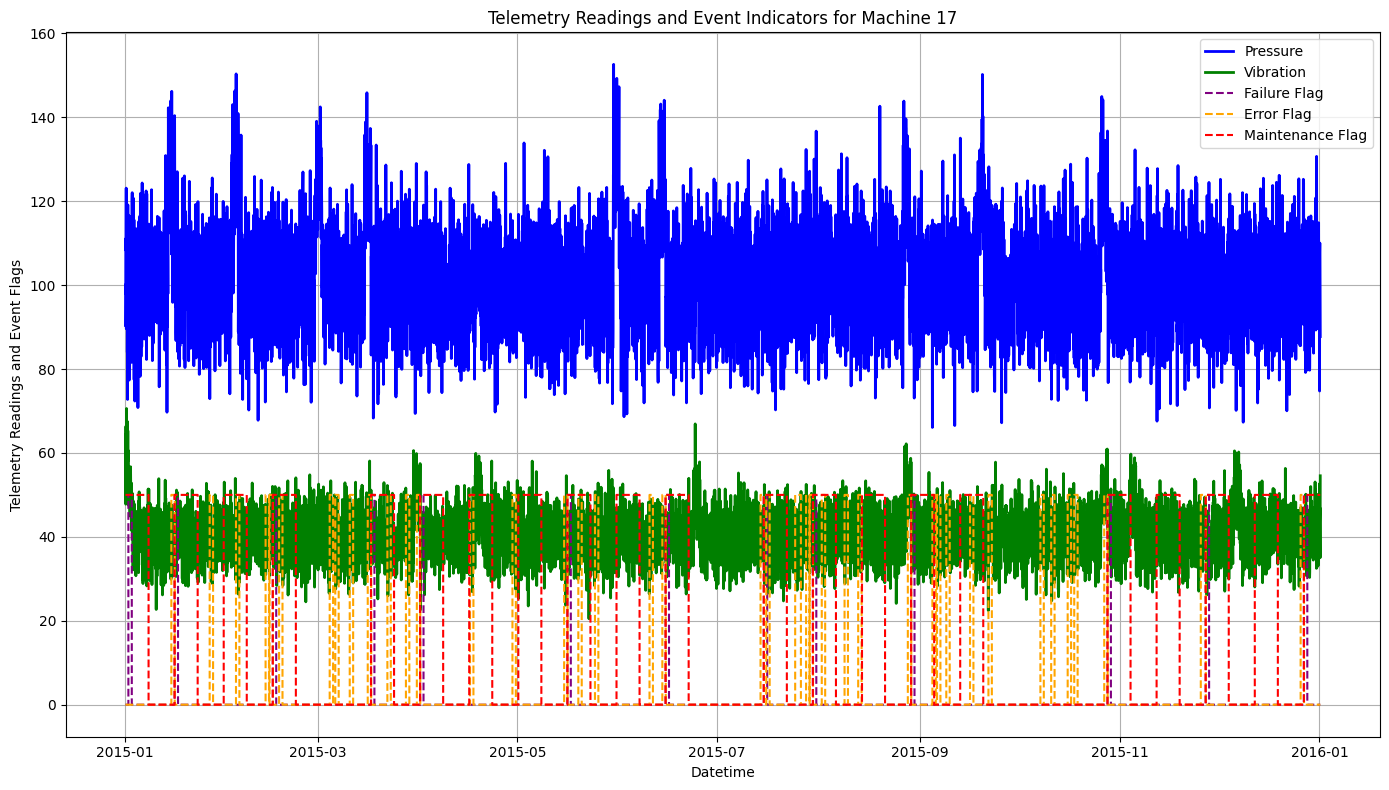

In [27]:
machine_id_to_plot = 17
plot_df = merged_df[merged_df['machineID'] == machine_id_to_plot]

plt.figure(figsize=(14, 8))
plt.plot(plot_df['datetime_telemetry'], plot_df['pressure'], label='Pressure', color='blue', linewidth=2)
plt.plot(plot_df['datetime_telemetry'], plot_df['vibration'], label='Vibration', color='green', linewidth=2)
if 'failure_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['failure_flag'] * 50, label='Failure Flag', color='purple', linestyle='--', where='post')
if 'error_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['error_flag'] * 50, label='Error Flag', color='orange', linestyle='--', where='post')
if 'maint_flag' in plot_df.columns:
    plt.step(plot_df['datetime_telemetry'], plot_df['maint_flag'] * 50, label='Maintenance Flag', color='red', linestyle='--', where='post')
plt.xlabel('Datetime')
plt.ylabel('Telemetry Readings and Event Flags')
plt.title(f'Telemetry Readings and Event Indicators for Machine {machine_id_to_plot}')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

- While for only 1 machine, this still shows a trend of reactive mainteance until the last quarter of 2015 and then a major uturn in proactive maintenace at the end of the year. 
- Errors are consistent and can lead to failures but the correlation isn't clear. 

### Feature Engineering 

In [28]:
# # RUL for machines
from sklearn.preprocessing import MinMaxScaler

# Handling Missing Timestamps and Calculating 'RUL'
merged_df['datetime_failure'] = merged_df['datetime_telemetry'].where(merged_df['failure_flag'] == 1)
merged_df['datetime_failure'] = merged_df.groupby('machineID')['datetime_failure'].bfill()
merged_df['datetime_telemetry'] = pd.to_datetime(merged_df['datetime_telemetry'])
merged_df['datetime_failure'] = pd.to_datetime(merged_df['datetime_failure'], errors='coerce')

num_na_rul = merged_df['datetime_failure'].isna().sum()
print(f"Number of rows with missing failure values (NaT): {num_na_rul}")

merged_df['RUL'] = (merged_df['datetime_failure'] - merged_df['datetime_telemetry']).dt.total_seconds() / 3600

mean_rul = merged_df['RUL'].mean()
print(f"Mean RUL used to impute missing values: {mean_rul}")

merged_df['RUL'].fillna(mean_rul, inplace=True)

rul_data = merged_df['RUL']

Number of rows with missing failure values (NaT): 118394
Mean RUL used to impute missing values: 886.6484982301843


In [29]:
# Time since last maintenance for machines (in hours)
merged_df['time_since_last_maint'] = (
    merged_df.groupby('machineID')['datetime_telemetry']
    .transform(lambda x: x - x.where(merged_df['maint_flag'] == 1).ffill())
).dt.total_seconds() / 3600
merged_df['time_since_last_maint'] = merged_df['time_since_last_maint'].fillna(99999)  

In [30]:
# # Time since last failure for components
# # components = ['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']
# for component in components:
#     merged_df[f'time_since_last_failure_{component}'] = (
#         merged_df.groupby('machineID')['datetime_telemetry']
#         .transform(lambda x: x - x.where(merged_df[component] == 1).ffill())
#     ).dt.total_seconds() / 3600
#     merged_df[f'time_since_last_failure_{component}'].fillna(0, inplace=True)

In [32]:
merged_df.head()

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,datetime_failure,fail_comp1,fail_comp2,...,datetime_maint,maint_comp1,maint_comp2,maint_comp3,maint_comp4,maint_flag,model,age,RUL,time_since_last_maint
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,2015-01-05 06:00:00,0,0,...,0,0,0,0,0,0,1,18,96.000000,99999.0
1,2015-01-01 06:00:00,53,183.084582,420.980061,109.235805,45.737760,2015-01-01,2015-03-29 06:00:00,0,0,...,0,0,0,0,0,0,1,5,2088.000000,99999.0
2,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01,2015-01-02 03:00:00,0,0,...,2014-12-28 06:00:00,0,1,0,0,1,4,14,21.000000,0.0
3,2015-01-01 06:00:00,12,171.404215,576.923563,97.145400,47.725909,2015-01-01,2015-01-07 06:00:00,0,0,...,0,0,0,0,0,0,1,9,144.000000,99999.0
4,2015-01-01 06:00:00,6,136.878588,492.088420,149.003582,22.973289,2015-01-01,NaT,0,0,...,2014-12-28 06:00:00,1,0,0,0,1,1,7,886.648498,0.0


#### Checks for RUL 

In [33]:
#1 Check RUL values after failure timestamps (should be 0)
df_after_failure = merged_df[merged_df['failure_flag'] == 1]

# Check if any RUL is greater than 0 after failure
incorrect_rul_after_failure = df_after_failure[df_after_failure['RUL'] > 0]

if not incorrect_rul_after_failure.empty:
    print("RUL values after failure that are not 0:")
    display(incorrect_rul_after_failure[['machineID', 'datetime_telemetry', 'failure_flag', 'RUL']])
else:
    print("All RUL values after failure are 0.")


All RUL values after failure are 0.


In [34]:
# Filter rows where failure has not occurred yet (failure_flag == 0)
df_before_failure = merged_df[merged_df['failure_flag'] == 0]
df_before_failure = df_before_failure.sort_values(by=['machineID', 'datetime_telemetry'])

# Calculate the RUL difference for each machine (to check if RUL is decreasing)
df_before_failure['RUL_diff'] = df_before_failure.groupby('machineID')['RUL'].diff()
incorrect_rul_before_failure = df_before_failure[df_before_failure['RUL_diff'] < 0]

# Show rows where RUL is increasing (which shouldn't happen)
if incorrect_rul_before_failure.empty:
    print("RUL values before failure that are not decreasing:")
    display(incorrect_rul_before_failure[['machineID', 'datetime_telemetry', 'RUL', 'RUL_diff']])
else:
    print("All RUL values before failure are decreasing correctly.")

All RUL values before failure are decreasing correctly.


In [35]:
#3 Check how many rows do not have a scheduled failure (next failure date is in the far future)
merged_df['datetime_failure'] = pd.to_datetime(merged_df['datetime_failure'], errors='coerce') 
merged_df['datetime_next_failure'] = merged_df.groupby('machineID')['datetime_failure'].bfill()

if 'datetime_next_failure' in merged_df.columns:
    print("datetime_next_failure column successfully created.")
else:
    print("datetime_next_failure column is missing.")

future_date = pd.Timestamp('2100-02-02')

no_scheduled_failure = merged_df[merged_df['datetime_next_failure'] == future_date]

num_no_scheduled_failure = len(no_scheduled_failure)
print(f"Number of rows with no scheduled failure: {num_no_scheduled_failure}")

datetime_next_failure column successfully created.
Number of rows with no scheduled failure: 0


In [36]:
# # Time since last maintenance for components
# for comp in ['maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4']:
#     merged_df[f'time_since_last_{comp}'] = (
#         merged_df.groupby('machineID')['datetime_telemetry']
#         # .transform(lambda x: x - x.where(merged_df[comp] == 1).ffill())
#     ).dt.total_seconds() / 3600  # Convert to hours
#     merged_df[f'time_since_last_{comp}'].fillna(0, inplace=True)

In [37]:
# Overall maintenance history
overall_maint_hist = merged_df['overall_maintenance_history'] = (
    merged_df.groupby('machineID')['maint_flag']
    .transform('sum')
)
overall_maint_hist

0         3912
1         3211
2         4033
3         3549
4         3284
          ... 
876095    4056
876096    3718
876097    3549
876098    3042
876099    3380
Name: maint_flag, Length: 876100, dtype: int32

In [38]:
# Interaction features
merged_df['pressure_x_volt'] = merged_df['pressure'] * merged_df['volt']
merged_df['pressure_x_vibration'] = merged_df['pressure'] * merged_df['vibration']
merged_df['rotate_x_vibration'] = merged_df['rotate'] * merged_df['vibration']
merged_df['rotate_x_volt'] = merged_df['rotate'] * merged_df['volt']

# Lag features
merged_df['vibration_t-1'] = merged_df['vibration'].shift(1)
merged_df['pressure_t-1'] = merged_df['pressure'].shift(1)
merged_df['volt_t-1'] = merged_df['volt'].shift(1)
merged_df['rotate_t-1'] = merged_df['rotate'].shift(1)

merged_df.fillna(0, inplace=True)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

merged_df_numeric = merged_df.select_dtypes(include=['float64', 'int64', 'int32']).drop(columns=['RUL'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df_numeric)

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(X_scaled)

anomaly_labels = isolation_forest.predict(X_scaled)

merged_df['anomaly_flag'] = (anomaly_labels == -1).astype(int)

print(merged_df[['anomaly_flag']].value_counts())

anomaly_flag
0               827902
1                48198
Name: count, dtype: int64


In [40]:
# Create interaction features between anomalies, failures, and maintenance
merged_df['anomaly_x_failure'] = merged_df['anomaly_flag'] * merged_df['failure_flag']
merged_df['anomaly_x_maint'] = merged_df['anomaly_flag'] * merged_df['maint_flag']


In [41]:
display(merged_df.head())

,datetime_telemetry,machineID,volt,rotate,pressure,vibration,date,datetime_failure,fail_comp1,fail_comp2,...,pressure_x_vibration,rotate_x_vibration,rotate_x_volt,vibration_t-1,pressure_t-1,volt_t-1,rotate_t-1,anomaly_flag,anomaly_x_failure,anomaly_x_maint
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01,2015-01-05 06:00:00,0,0,...,5098.422421,18869.380370,73747.890142,0.000000,0.000000,0.000000,0.000000,1,0,0
1,2015-01-01 06:00:00,53,183.084582,420.980061,109.235805,45.737760,2015-01-01,2015-03-29 06:00:00,0,0,...,4996.201083,19254.685124,77074.958296,45.087686,113.077935,176.217853,418.504078,0,0,0
2,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,2015-01-01,2015-01-02 03:00:00,0,0,...,4652.552648,16138.098697,64866.873929,45.737760,109.235805,183.084582,420.980061,0,0,0
3,2015-01-01 06:00:00,12,171.404215,576.923563,97.145400,47.725909,2015-01-01,2015-01-07 06:00:00,0,0,...,4636.352550,27534.201506,98887.130527,41.944692,110.921131,168.596133,384.747105,0,0,0
4,2015-01-01 06:00:00,6,136.878588,492.088420,149.003582,22.973289,2015-01-01,0,0,0,...,3423.102423,11304.889715,67356.368277,47.725909,97.145400,171.404215,576.923563,1,0,1


In [42]:

merged_df_numeric = merged_df.select_dtypes(include=['float64', 'int64', 'int32'])
corr_matrix = merged_df_numeric.corr()
merged_df_numeric.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'fail_comp1',
       'fail_comp2', 'fail_comp3', 'fail_comp4', 'failure_flag', 'error1',
       'error2', 'error3', 'error4', 'error5', 'error_flag', 'maint_comp1',
       'maint_comp2', 'maint_comp3', 'maint_comp4', 'maint_flag', 'model',
       'age', 'RUL', 'time_since_last_maint', 'overall_maintenance_history',
       'pressure_x_volt', 'pressure_x_vibration', 'rotate_x_vibration',
       'rotate_x_volt', 'vibration_t-1', 'pressure_t-1', 'volt_t-1',
       'rotate_t-1', 'anomaly_flag', 'anomaly_x_failure', 'anomaly_x_maint'],
      dtype='object')

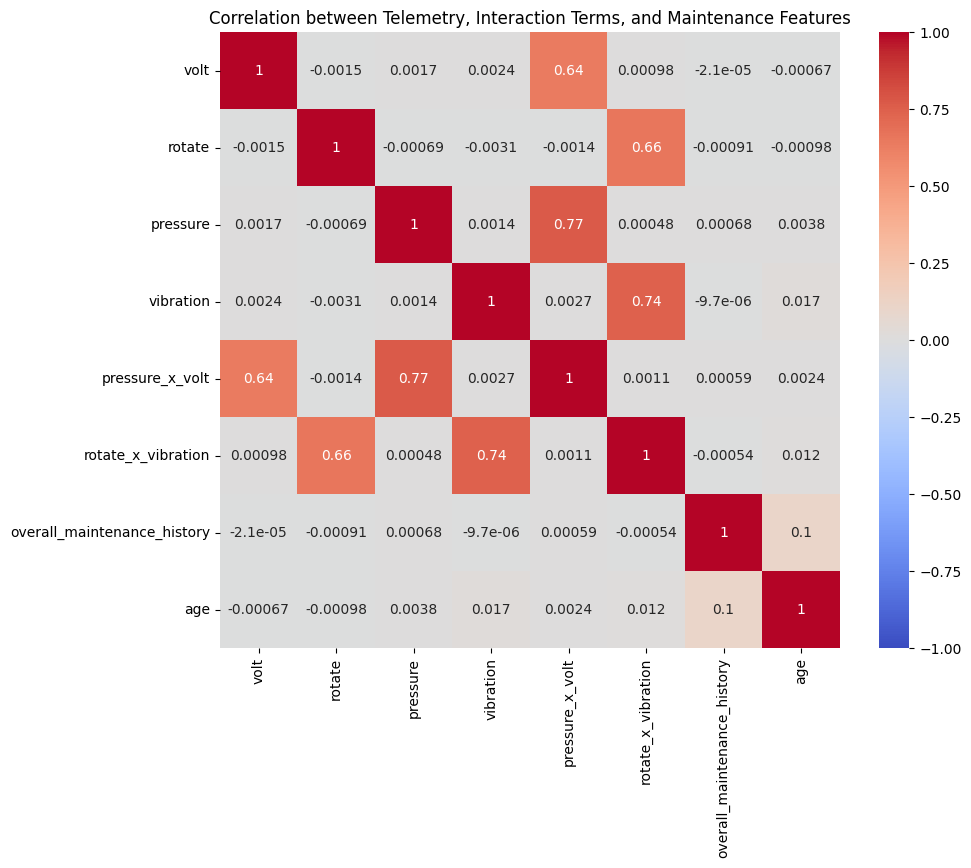

In [43]:
subset_columns = ['volt', 'rotate', 'pressure', 'vibration', 'pressure_x_volt', 'rotate_x_vibration', 'overall_maintenance_history', 'age']
corr_subset = merged_df_numeric[subset_columns].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Telemetry, Interaction Terms, and Maintenance Features')
plt.show()

- Interaction terms like pressure_x_volt and rotate_x_vibration are strongly correlated with their base features (e.g., pressure, volt, vibration), which may indicate redundancy unless they capture non-linear relationships.

- Overall maintenance history and machine age show very weak correlations with sensor data, suggesting these features might not heavily influence real-time telemetry.

- Therefore, we will apply Isolation Forest and Random Forest to help narrow down the feature selection process and identify the most relevant variables for model performance.

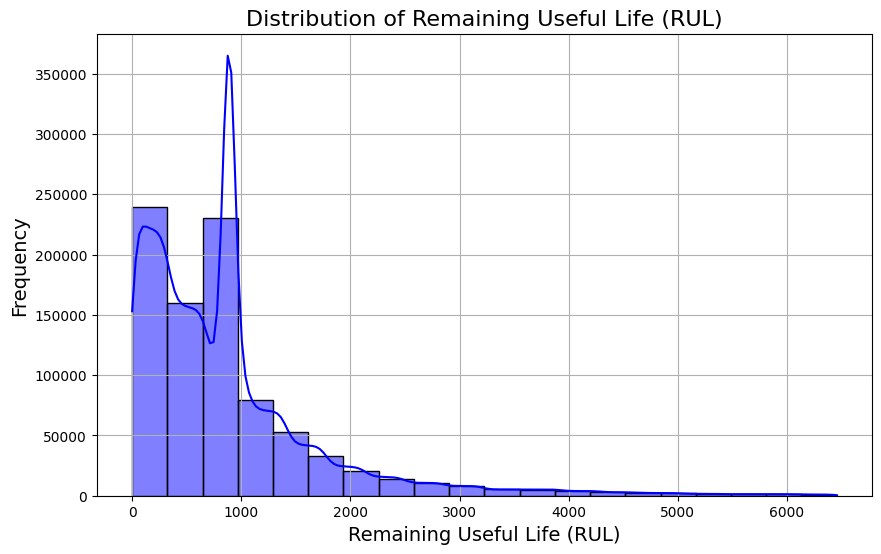

In [44]:
# Plotting the distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(rul_data, bins=20, kde=True, color='blue')
plt.title('Distribution of Remaining Useful Life (RUL)', fontsize=16)
plt.xlabel('Remaining Useful Life (RUL)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

- Presence of Imputed RUL Values: The sharp peak around the mean RUL indicates that many machines or components have missing failure information, leading to a concentration of imputed values.
This can skew model training because the imputed RUL values do not represent real failure patterns and could distort model predictions.

- Right-Skewed Distribution: The right-skewed nature of the distribution suggests that most components/machines have a relatively low RUL, with fewer instances of very high RUL values. This is typical in real-world predictive maintenance data, as machines are more likely to be closer to failure than far away from it.

TO DO - Imputation Flag: Add a binary feature that flags rows where the RUL has been imputed. This might help the model distinguish between real and imputed data during prediction.

#### Feature Reduction

In [45]:
merged_df.columns

Index(['datetime_telemetry', 'machineID', 'volt', 'rotate', 'pressure',
       'vibration', 'date', 'datetime_failure', 'fail_comp1', 'fail_comp2',
       'fail_comp3', 'fail_comp4', 'failure_flag', 'datetime_error', 'error1',
       'error2', 'error3', 'error4', 'error5', 'error_flag', 'datetime_maint',
       'maint_comp1', 'maint_comp2', 'maint_comp3', 'maint_comp4',
       'maint_flag', 'model', 'age', 'RUL', 'time_since_last_maint',
       'datetime_next_failure', 'overall_maintenance_history',
       'pressure_x_volt', 'pressure_x_vibration', 'rotate_x_vibration',
       'rotate_x_volt', 'vibration_t-1', 'pressure_t-1', 'volt_t-1',
       'rotate_t-1', 'anomaly_flag', 'anomaly_x_failure', 'anomaly_x_maint'],
      dtype='object')

In [46]:
merged_df_numeric.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'fail_comp1',
       'fail_comp2', 'fail_comp3', 'fail_comp4', 'failure_flag', 'error1',
       'error2', 'error3', 'error4', 'error5', 'error_flag', 'maint_comp1',
       'maint_comp2', 'maint_comp3', 'maint_comp4', 'maint_flag', 'model',
       'age', 'RUL', 'time_since_last_maint', 'overall_maintenance_history',
       'pressure_x_volt', 'pressure_x_vibration', 'rotate_x_vibration',
       'rotate_x_volt', 'vibration_t-1', 'pressure_t-1', 'volt_t-1',
       'rotate_t-1', 'anomaly_flag', 'anomaly_x_failure', 'anomaly_x_maint'],
      dtype='object')

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

target = 'RUL'
features = merged_df_numeric.drop(columns=[target]).columns.tolist()

train_data = merged_df[(merged_df['datetime_telemetry'] >= '2014-06-01') & 
                       (merged_df['datetime_telemetry'] <= '2015-08-31')]
val_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-09-01') & 
                     (merged_df['datetime_telemetry'] <= '2015-10-31')]
test_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-11-01') & 
                      (merged_df['datetime_telemetry'] <= '2015-12-31')]

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"Random Forest Validation MAE: {val_mae}")

y_test_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Random Forest Test MAE: {test_mae}")

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


Random Forest Validation MAE: 578.3316292963874
Random Forest Test MAE: 549.5010191046063
                        Feature  Importance
0                     machineID    0.197211
22                          age    0.133311
23        time_since_last_maint    0.090887
21                        model    0.063139
24  overall_maintenance_history    0.051808
29                vibration_t-1    0.035511
32                   rotate_t-1    0.035465
30                 pressure_t-1    0.035264
31                     volt_t-1    0.035262
3                      pressure    0.031371
2                        rotate    0.031117
1                          volt    0.030308
4                     vibration    0.028537
28                rotate_x_volt    0.027397
25              pressure_x_volt    0.027201
26         pressure_x_vibration    0.027009
27           rotate_x_vibration    0.026643
17                  maint_comp2    0.016521
9                  failure_flag    0.013989
19                  maint_comp

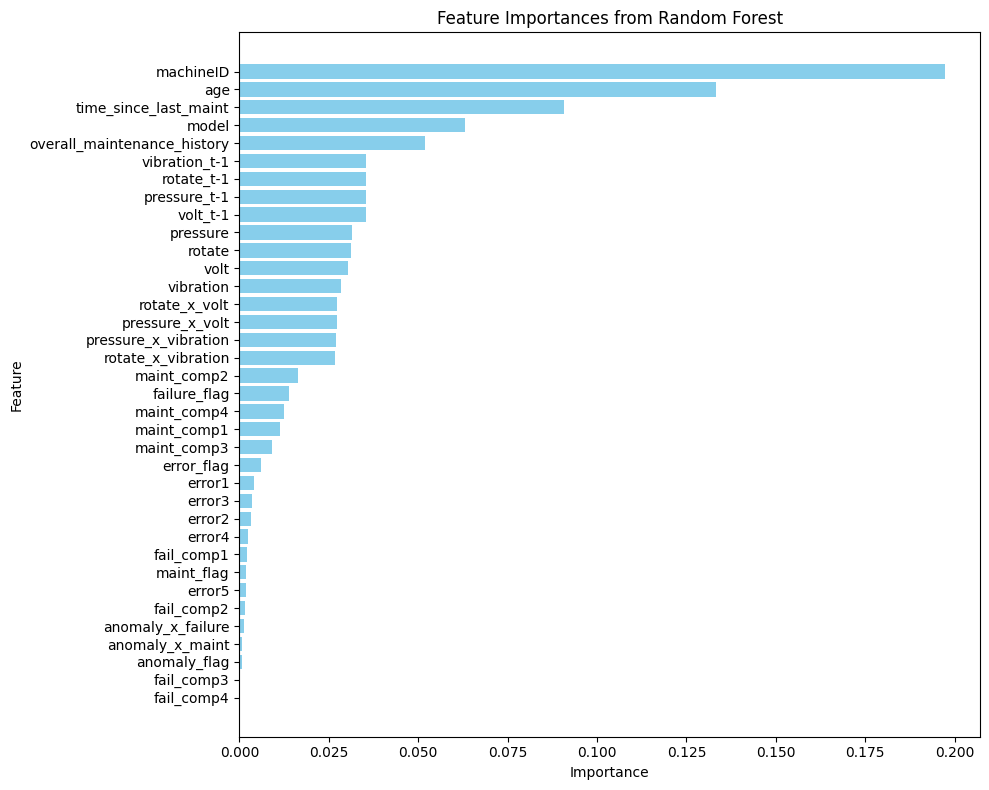

In [50]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Selected features contributing to 95% of total importance: ['machineID', 'age', 'time_since_last_maint', 'model', 'overall_maintenance_history', 'vibration_t-1', 'rotate_t-1', 'pressure_t-1', 'volt_t-1', 'pressure', 'rotate', 'volt', 'vibration', 'rotate_x_volt', 'pressure_x_volt', 'pressure_x_vibration', 'rotate_x_vibration', 'maint_comp2', 'failure_flag']
19


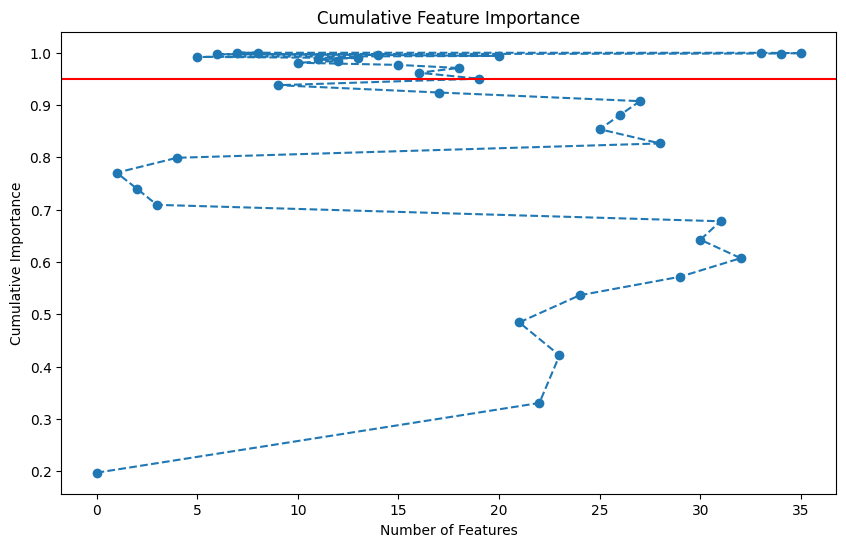

In [57]:
# Calculate cumulative importance
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
selected_features = feature_importance_df[feature_importance_df['Cumulative Importance'] <= 0.95]['Feature'].tolist()
print(f"Selected features contributing to 95% of total importance: {selected_features}")

print(len(selected_features))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df['Cumulative Importance'], marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()


In [64]:
# Features contributing to 95% of total importance
selected_features = feature_importance_df[feature_importance_df['Cumulative Importance'] <= 0.95]['Feature'].tolist()
merged_df_final = merged_df[selected_features]
display(merged_df_final)

,machineID,age,time_since_last_maint,model,overall_maintenance_history,vibration_t-1,rotate_t-1,pressure_t-1,volt_t-1,pressure,rotate,volt,vibration,rotate_x_volt,pressure_x_volt,pressure_x_vibration,rotate_x_vibration,maint_comp2,failure_flag
0,1,18,99999.0,1,3912,0.000000,0.000000,0.000000,0.000000,113.077935,418.504078,176.217853,45.087686,73747.890142,19926.351011,5098.422421,18869.380370,0,0
1,53,5,99999.0,1,3211,45.087686,418.504078,113.077935,176.217853,109.235805,420.980061,183.084582,45.737760,77074.958296,19999.391711,4996.201083,19254.685124,0,0
2,99,14,0.0,4,4033,45.737760,420.980061,109.235805,183.084582,110.921131,384.747105,168.596133,41.944692,64866.873929,18700.873735,4652.552648,16138.098697,1,0
3,12,9,99999.0,1,3549,41.944692,384.747105,110.921131,168.596133,97.145400,576.923563,171.404215,47.725909,98887.130527,16651.131127,4636.352550,27534.201506,0,0
4,6,7,0.0,1,3284,47.725909,576.923563,97.145400,171.404215,149.003582,492.088420,136.878588,22.973289,67356.368277,20395.399981,3423.102423,11304.889715,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,70,9,24.0,1,4056,43.575928,501.248854,102.250342,152.966549,89.725251,457.661580,188.135372,42.932201,86102.331679,16880.493421,3852.102520,19648.419070,0,0
876096,71,18,72.0,3,3718,42.932201,457.661580,89.725251,188.135372,111.231561,349.326013,174.028202,38.669674,60792.577917,19357.428495,4301.288232,13508.323178,0,0
876097,72,2,144.0,2,3549,38.669674,349.326013,111.231561,174.028202,104.658441,381.242172,183.176861,38.504998,69834.744509,19171.004667,4029.872995,14679.728887,0,0
876098,74,4,144.0,2,3042,38.504998,381.242172,104.658441,183.176861,101.785150,494.616310,188.299688,41.609665,93136.097016,19166.112030,4235.245956,20580.818773,0,0


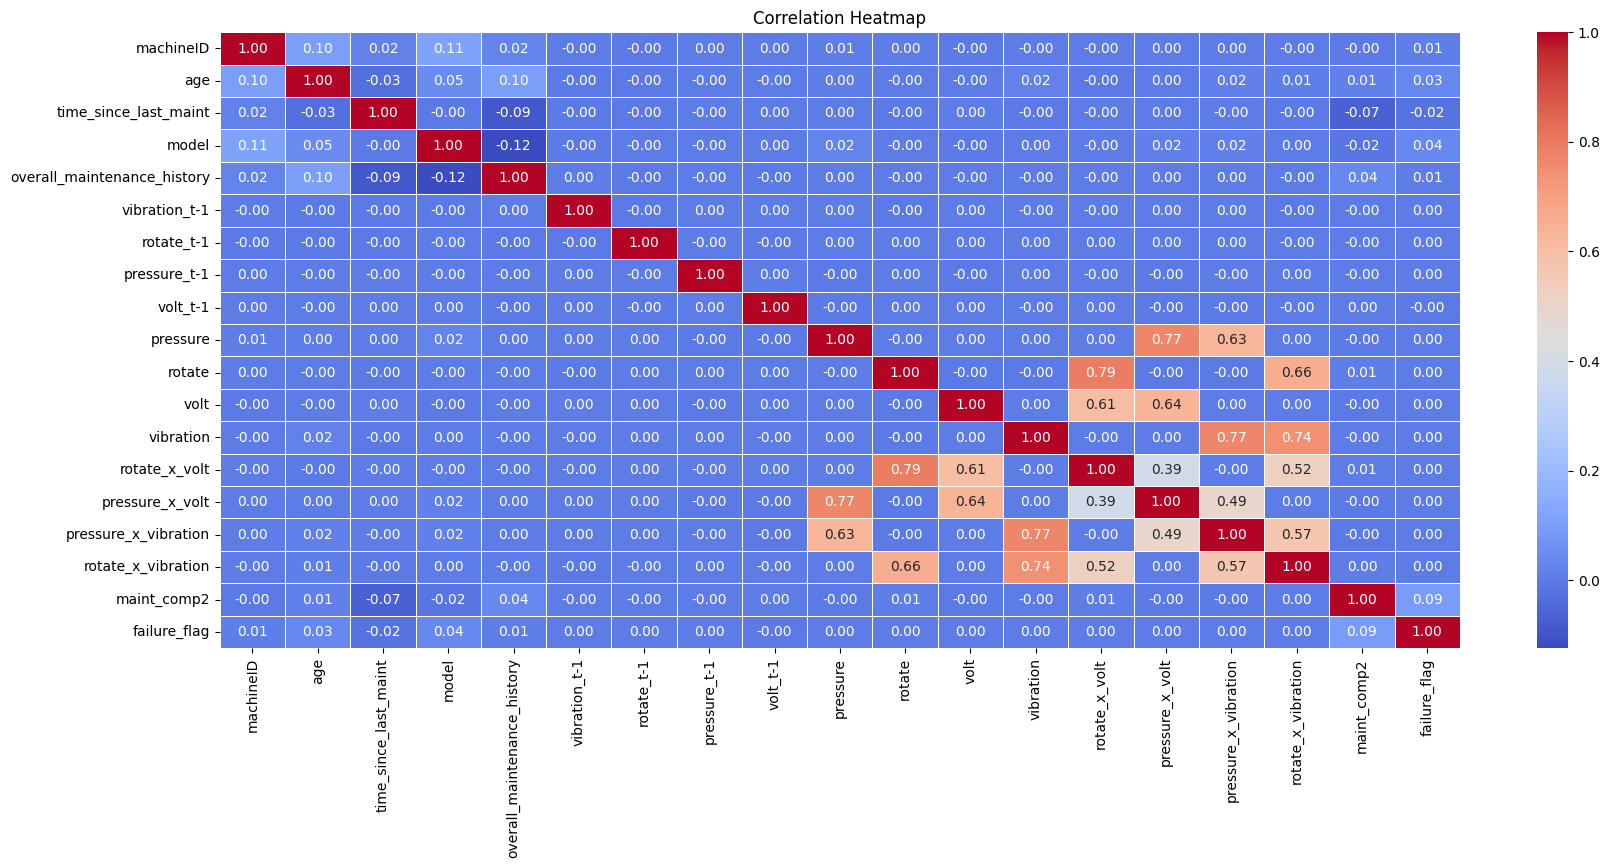

In [65]:
corr_matrix = merged_df_final.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [84]:
import os
import tensorflow as tf
from tensorflow import keras 

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model  # type: ignore
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Conv1D, Dense, Flatten # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # type: ignore
from tcn import TCN

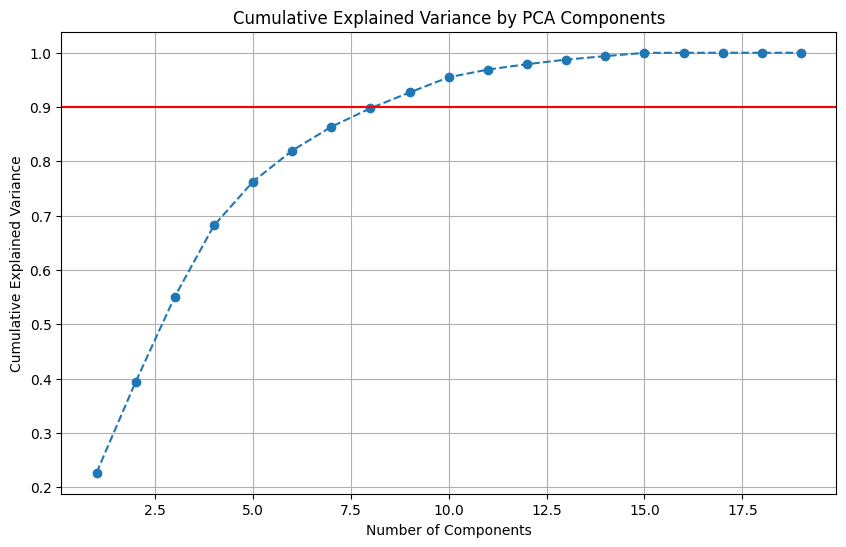

Cumulative Explained Variance: [0.22691936 0.39416752 0.55092735 0.68199416 0.76285598 0.81991379
 0.86371088 0.89780503 0.92692848 0.95484576 0.96902677 0.97892016
 0.98734363 0.99370924 0.9997895  0.99988715 0.99993261 0.99997316
 1.        ]


In [67]:
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df_final)

pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", explained_variance)

- Just under 98% of variance explained by 10 components so we'll use this.

##### Model Build

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

train_data = merged_df[(merged_df['datetime_telemetry'] >= '2014-06-01') &
                       (merged_df['datetime_telemetry'] <= '2015-08-31')]
val_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-09-01') &
                     (merged_df['datetime_telemetry'] <= '2015-10-31')]
test_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-11-01') &
                      (merged_df['datetime_telemetry'] <= '2015-12-31')]

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

reduced_features = merged_df_final.columns.tolist()

train_data_reduced = train_data[reduced_features]
val_data_reduced = val_data[reduced_features]
test_data_reduced = test_data[reduced_features]

num_features = len(reduced_features)

# X (Independent variables)
train_features_scaled = scaler.transform(train_data[reduced_features])
val_features_scaled = scaler.transform(val_data[reduced_features])
test_features_scaled = scaler.transform(test_data[reduced_features])

n_components = 12
pca = PCA(n_components=n_components)

train_features_pca = pca.fit_transform(train_features_scaled)
val_features_pca = pca.transform(val_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# y (dependent variables)
train_regression_targets = train_data[['RUL']].values
val_regression_targets = val_data[['RUL']].values
test_regression_targets = test_data[['RUL']].values

print(train_features_pca.shape)
print(val_features_pca.shape)
print(test_features_pca.shape)
print(train_regression_targets.shape)
print(val_regression_targets.shape)
print(test_regression_targets.shape)

(580300, 10)
(144100, 10)
(144100, 10)
(580300, 1)
(144100, 1)
(144100, 1)


In [70]:
import numpy as np

def create_sequences(features, regression_targets, sequence_length):
    """
    Create sequences of features and corresponding regression targets for time series prediction.

    Parameters:
    - features: numpy array of shape (num_samples, num_features), input features.
    - regression_targets: numpy array of shape (num_samples, num_targets), target for regression (e.g., RUL).
    - sequence_length: int, the length of the sequences to create.

    Returns:
    - X: numpy array of shape (num_sequences, sequence_length, num_features), input sequences.
    - y: numpy array of shape (num_sequences, num_targets), regression targets for the last time step of each sequence.
    """
    X = np.array([features[i:i + sequence_length] for i in range(len(features) - sequence_length)])
    y = np.array([regression_targets[i + sequence_length] for i in range(len(features) - sequence_length)])
    return X, y

sequence_length = 72  

X_train, y_train = create_sequences(train_features_pca, train_regression_targets, sequence_length)
X_val, y_val = create_sequences(val_features_pca, val_regression_targets, sequence_length)
X_test, y_test = create_sequences(test_features_pca, test_regression_targets, sequence_length)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("X_train shape:", y_train.shape)
print("X_val shape:", y_val.shape)
print("X_test shape:", y_test.shape)

X_train shape: (580228, 72, 10)
X_val shape: (144028, 72, 10)
X_test shape: (144028, 72, 10)
X_train shape: (580228, 1)
X_val shape: (144028, 1)
X_test shape: (144028, 1)


In [73]:
import tcn
from tcn import TCN
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

input_shape = (sequence_length, 10) #from PCA reduction
inputs = Input(shape=input_shape)

x = TCN(nb_filters=128, kernel_size=3, dilations=[1, 2, 4, 8, 16],
        nb_stacks=3, padding='causal', kernel_initializer=HeNormal())(inputs)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
output_rul = Dense(1, activation='linear', name='regression_output_rul')(x)

model = Model(inputs=inputs, outputs=[output_rul])

model.compile(optimizer=Adam(),
              loss=Huber(),
              metrics=['mean_absolute_error'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 72, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tcn_1 (TCN)                     │ (None, 128)            │     1,434,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_output_rul (Dense)   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,451,137 (5.54 MB)

 Trainable params: 1,451,137 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from sklearn.utils.class_weight import compute_sample_weight

train_data['RUL_clipped'] = np.clip(train_data['RUL'], 0, 4000)

sample_weights = compute_sample_weight('balanced', train_data['RUL_clipped'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00005)

y_train = train_data['RUL_clipped'].values

history = model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/3
16151/36265 ━━━━━━━━━━━━━━━━━━━━ 27:59 84ms/step - loss: 680.1860 - mean_absolute_error: 680.6851

KeyboardInterrupt: 

In [75]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


Key Insights:
- 

In [106]:
import tensorflow as tf
model_path = r'C:\Users\rshaw\Desktop\EC Utbildning - Data Science\Kurs 9 - Project\Project\ds23_projektkurs\predictive-maintenance\models\Trained models'
model_save_path = os.path.join(model_path, 'tcn_multitask_model_v1.keras')
model.save(model_save_path)

In [ ]:
predictions

In [ ]:
plt.figure(figsize=(16, 10))

# Plot for Regression Loss for Component 1
plt.subplot(2, 2, 1)
plt.plot(history.history['regression_output_comp1_loss'], label='Train')
plt.plot(history.history['val_regression_output_comp1_loss'], label='Validation')
plt.title('Model Regression Loss for Comp1')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot for Regression Loss for Component 2
plt.subplot(2, 2, 2)
plt.plot(history.history['regression_output_comp2_loss'], label='Train')
plt.plot(history.history['val_regression_output_comp2_loss'], label='Validation')
plt.title('Model Regression Loss for Comp2')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot for Regression Loss for Component 3
plt.subplot(2, 2, 3)
plt.plot(history.history['regression_output_comp3_loss'], label='Train')
plt.plot(history.history['val_regression_output_comp3_loss'], label='Validation')
plt.title('Model Regression Loss for Comp3')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot for Regression Loss for Component 4
plt.subplot(2, 2, 4)
plt.plot(history.history['regression_output_comp4_loss'], label='Train')
plt.plot(history.history['val_regression_output_comp4_loss'], label='Validation')
plt.title('Model Regression Loss for Comp4')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('mssql+pyodbc://MSI/predictive_maintenance_db?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
table_name = 'robs_merged_PdM_data'
merged_df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

print(f"Table '{table_name}' has been successfully saved to the database.")

In [ ]:
# table_name = 'robs_processed_PdM_data'

# # Save DataFrame to the SQL database as a new table
# merged_df_final.to_sql(table_name, con=engine, if_exists='replace', index=False)

# print(f"Data saved successfully to '{table_name}' in the database.")